
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 5</p>
## <p style="text-align: center;">Total points: 35</p>
## <p style="text-align: center;">Due: Monday, November 27th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Ensembles (1+12+2 = 15pts)
In this question, we will compare performance of different ensemble methods: [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [Gradient Boosting Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) (GBDT), and [XGBoost](http://xgboost.readthedocs.io/en/latest/).  Note that you have to install xgboost package in addition to scikit-learn.  You can see installation guides [here](http://xgboost.readthedocs.io/en/latest/build.html).




Two  datasets are provided for this problem. For **each of the datasets ((X1.csv, y1.csv), (X2.csv, y2.csv))**, do the following:

1. Load the data and partition it into features (X) and the target label (y) for classification task. Then, use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split data into training and testing: test_size=0.33, random_state=42.

2. Build a classifier using [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [Gradient Boosting Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), and [XGBoost](http://xgboost.readthedocs.io/en/latest/), respectively, and answer the following for each classifier.

 - Mention any design choices (with reasoning/justification) that you made, e.g. the hyperparameters considered for each classifier.
 - Report the mean error rate (fraction of incorrect labels) and the confusion matrix on test data. <br>
 - Report the feature importance and time of execution (training and predicting times).

3. Compare the three classifiers for the two different datasets ((X1.csv, y1.csv), (X2.csv, y2.csv)) in terms of the misclassification rate.  What are the characteristics of the dataset and the classifiers that resulted in somewhat different comparative results?

In [1]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev1\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [68]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from time import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Solution

# For Data 1, (X1,y1)

## part 1

In [69]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [70]:
# load each data set
X1 = pd.read_csv('X1.csv')
y1 = pd.read_csv('y1.csv')
X2 = pd.read_csv('X2.csv')
y2 = pd.read_csv('y2.csv')

In [71]:
# split each data set into training and testing set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=42)

## part 2

(9999, 30)


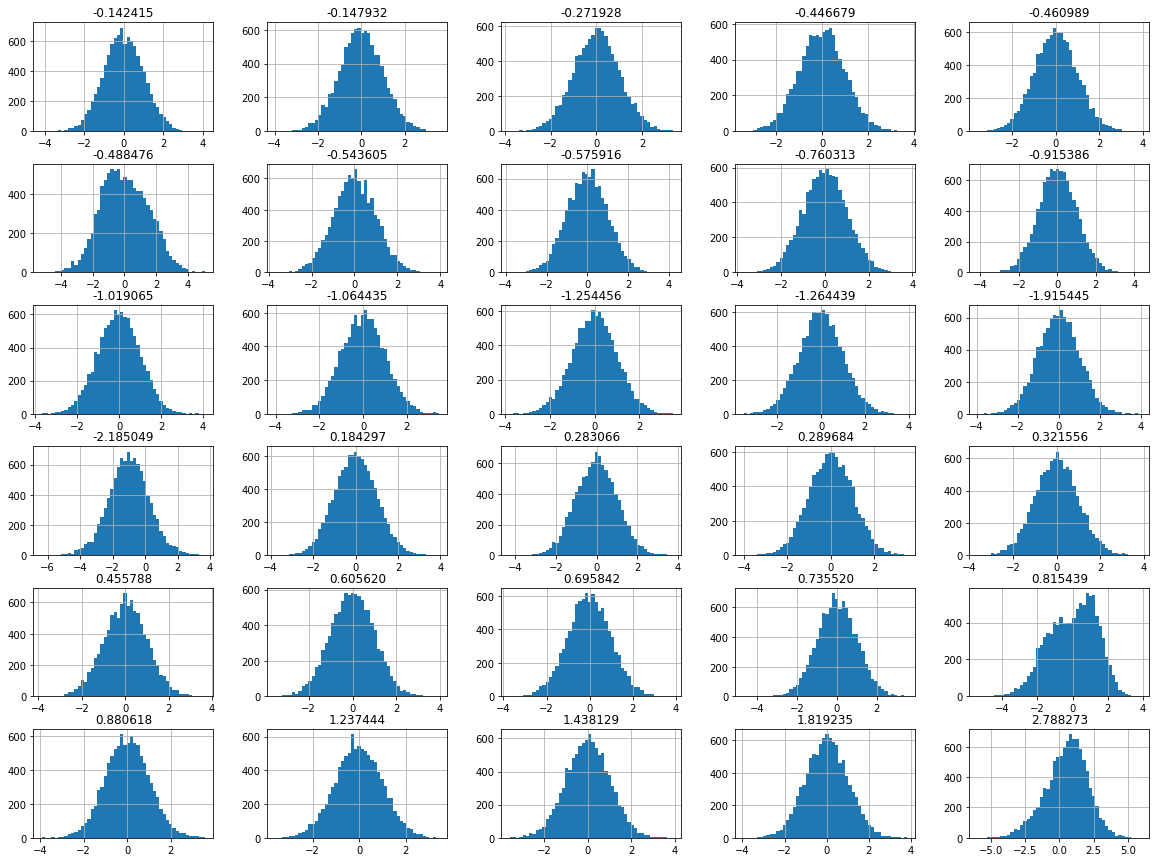

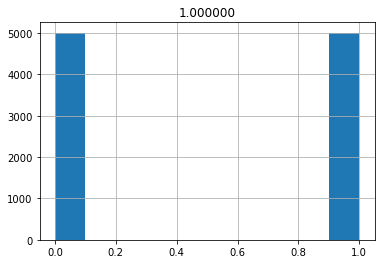

In [72]:
print X1.shape
X1.hist(bins=50, figsize=(20,15))
y1.hist()
plt.show()

In data set (X1,y1), every variable nearly perfect follows normal distribution except feature 25 is slightly different. And y value is either class 0 or class 1 and each class has similar size (around 5000 for class 0, 5000 for class 1). 

In [73]:
# using Random Forest 
# make criterion = 'entropy', test error changes from 0.1593 to 0.156666
# max_depth = 2 or 3 has same best test errors, test error is still 0.156666
# max_features = 12 improves from 0.15666 t0 0.15
RF = RandomForestClassifier(criterion='entropy',max_depth=20, random_state=0, max_features=28)
RF.fit(X1_train, y1_train)
y1_predicted_train = RF.predict(X1_train)
y1_predicted_test = RF.predict(X1_test)
print 'Training set MSE is', mean_squared_error(y1_train, y1_predicted_train)
print 'Testing set MSE is', mean_squared_error(y1_test, y1_predicted_test)
print 'The confusion matrix is:\n',confusion_matrix(y1_test,y1_predicted_test)
print 'The features importance is shown as following matrix:\n',RF.feature_importances_
print metrics.accuracy_score(y1_test,y1_predicted_test)

Training set MSE is 0.00552321241976
Testing set MSE is 0.0863636363636
The confusion matrix is:
[[1567  133]
 [ 152 1448]]
The features importance is shown as following matrix:
[ 0.07768061  0.00983699  0.00760746  0.00797506  0.01077287  0.00749434
  0.00895328  0.00763865  0.0074954   0.00984153  0.00907784  0.0095423
  0.00997116  0.00872612  0.00791259  0.01044357  0.01135784  0.01024489
  0.12784597  0.00915813  0.00777456  0.11109579  0.45477562  0.00618641
  0.00938736  0.0084616   0.00766416  0.00882369  0.00953727  0.00671694]
0.913636363636


In [75]:
# using Random Forest 
RF = RandomForestClassifier(criterion='entropy',max_depth=20, random_state=0, max_features=28)
RF.fit(X1_train, y1_train)
y_predicted_train = RF.predict(X1_train)
y_predicted_test = RF.predict(X1_test)
print 'training set MSE is', mean_squared_error(y1_train, y_predicted_train)
print 'testing set MSE is', mean_squared_error(y1_test, y_predicted_test)
confusion_matrix
metrics.accuracy_score(y1_test,y_predicted_test)

training set MSE is 0.00552321241976
testing set MSE is 0.0863636363636


0.91363636363636369

In [ ]:
# using Gradient Boosting Decision Tree


In [ ]:
# XGBoost

In [76]:
# Compute train and test errors
alphas = np.arange(2, 30, 1)
RF = RandomForestClassifier(criterion='entropy', random_state=0)
train_errors = list()
test_errors = list()
for alpha in alphas:
    RF.set_params(max_depth=alpha)
    RF.fit(X1_train, y1_train)
    train_errors.append(RF.score(X1_train, y1_train))
    test_errors.append(RF.score(X1_test, y1_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

Optimal regularization parameter : 20


In [77]:
# Compute train and test errors
alphas = np.arange(2, 30, 1)
RF = RandomForestClassifier(criterion='entropy', random_state=0)
train_errors = list()
test_errors = list()
for alpha in alphas:
    RF.set_params(max_features=alpha)
    RF.fit(X1_train, y1_train)
    train_errors.append(RF.score(X1_train, y1_train))
    test_errors.append(RF.score(X1_test, y1_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

Optimal regularization parameter : 28


In [84]:
# Create a classifier object with the classifier and parameter candidates
parameter_candidates = {
    'criterion': ('gini', 'entropy'),
    'max_depth': np.arange(2, 6, 1),
    'max_features': np.arange(2, 31, 4)
}
RF = RandomForestClassifier(random_state=0)
GS = GridSearchCV(estimator=RF, param_grid=parameter_candidates,cv=10)

# Train the classifier on data1's feature and target data
GS.fit(X1_train, y1_train)
print GS.best_params_

{'max_features': 30, 'criterion': 'gini', 'max_depth': 5}


# Question 2: Visualization using Bokeh (10 pts)

In this problem, you'll build an interactive visualization. Bokeh is a Python interactive visualization library that targets modern web browsers for presentation. For more information on Bokeh, see http://bokeh.pydata.org/en/latest/. The problem statement is as follows:

Using the "nbasalariesfull.csv" data set from HMK4, your goal is to build a Bokeh visualization which allows the user to explore how salary (on a log scale) varies with points per game (PSG) and age. You will create a visualization that allows the user to toggle the X axis of a scatter plot between PSG and age, with the y-axis always being log Salary. Also add the hover tool so that if the user hovers over a datapoint in the plot a window pops up that shows the player name, team, position, salary, and the current x variable (PSG or age) depending on the current tab.  Color each point according to a player's position and provide a legend for the colors. Add the ability to Zoom in/out.  Add slight horizontal jitter to a player's age.

Hints: 
1. see: http://bokeh.pydata.org/en/latest/docs/user_guide/tools.html#basic-tooltips for hover and zoom tool examples.
2. See: http://bokeh.pydata.org/en/latest/docs/reference/plotting.html. Look for the scatter API.
3. See: http://bokeh.pydata.org/en/0.10.0/docs/user_guide/styling.html#labels. For labeling axes.
4. See: https://bokeh.pydata.org/en/latest/docs/user_guide/categorical.html  for how to use jitter transform
5. See: http://bokeh.pydata.org/en/latest/docs/gallery/iris.html for coloring points by category
6. Use output_notebook() from Bokeh to output the plot to your notebook

Include an image screenshot in addition to the visualization output.

In [11]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from bokeh.models.widgets import Panel, Tabs
from bokeh.models import CustomJS, ColumnDataSource, HoverTool, BoxZoomTool
from bokeh.transform import jitter
from bokeh.plotting import figure, output_notebook, show

data = pd.read_csv("nbasalariesfull.csv")
data["logsalary"] = data.SALARY.apply(np.log)

## Solution

# Question 3: Diabetes classification using support vector machines (4+3+3=10 pts) 
(a) Apply a linear SVM, using the scikit-SVM, for the Pima Indian Women diabetes detection problem on the dataset provided (details on dataset here  http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) . Specify how you chose the slack cost/penalty (‘C’ parameter)for the model. Maintain all other parameters as default. Hint: http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html will make 10-fold cross-validation easier.
The code to get the training/testing data is provided below.

(b) Repeat (a) but using a Gaussian radial basis kernel.

(c) Summarize the comparative performance (mean error rates) of the classifiers. What do you conclude? (be brief).

In [18]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn import grid_search

data_train = pd.read_csv('diabetes_train-log.csv')
data_test = pd.read_csv('diabetes_test-log.csv')
cols = ['numpreg', 'plasmacon', 'bloodpress', 'skinfold', 'seruminsulin', 'BMI', 'pedigreefunction', 'age']

xtrain = np.asmatrix(data_train[cols])
ytrain = np.asarray(data_train['classvariable']).T

xtest = np.asmatrix(data_test[cols])
ytest = np.asarray(data_test['classvariable']).T

## SOLUTION

In [ ]:
from sklearn.metrics import fbeta_score, make_scorer
def per_class_accuracy(ground_truth, prediction):
    cm = confusion_matrix(ground_truth, prediction)
    tp = float(cm[1][1])
    tn = float(cm[0][0])
    return (tp + tn) / len(ground_truth)


my_scorer = make_scorer(per_class_accuracy, greater_is_better=True)

tuned_parameters = {'C': np.logspace(-6, 3, 15)}
LSVC=SVC(kernel='linear')
clf = GridSearchCV(LSVC,tuned_parameters,scoring=my_scorer,cv=10)
clf.fit(xtrain, ytrain)
print clf.best_params_
print clf.best_score_     

In [ ]:
LinearSVC=SVC(C=0.1, kernel='linear')
LinearSVC.fit(xtrain, ytrain)
ypredictedL = LinearSVC.predict(xtest)
conf_matL = confusion_matrix(ytest, ypredictedL)
conf_matL